In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

## Titanic
data_titanic = pd.read_csv("data/titanic/train.csv")

column_titanic_dict = {"PassengerId": "PassengerId", "Survived": "Survived", "Pclass": "TicketClass", "Name": "Name", "Sex": "Sex", "Age": "Age", "SibSp": "NumberSiblingsSpouses", "Parch": "NumberParentsChildren", "Ticket": "TicketNumber", "Fare": "Fare", "Cabin": "CabinNumber", "Embarked": "Port"}
data_titanic = data_titanic.rename(columns=column_titanic_dict)

train_X_titanic_columns = ["TicketClass", "Sex", "Age", "NumberSiblingsSpouses", "NumberParentsChildren", "Fare", "Port"]
train_y_titanic_columns = ["Survived"]
train_X_titanic_ordinal_columns = ["Sex", "Port"]

X_titanic = data_titanic[train_X_titanic_columns]
y_titanic = data_titanic[train_y_titanic_columns]
 
X_titanic.loc[:, train_X_titanic_ordinal_columns] = OrdinalEncoder().fit_transform(X_titanic[train_X_titanic_ordinal_columns])

X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(X_titanic, y_titanic, test_size=0.4)
y_titanic_train = np.squeeze(y_titanic_train)
y_titanic_test = np.squeeze(y_titanic_test)

## Machine Failure
data_machine_failure = pd.read_csv("data/machine_failure/train.csv")

column_machine_failure_dict = {"PassengerId": "PassengerId", "Survived": "Survived", "Pclass": "TicketClass", "Name": "Name", "Sex": "Sex", "Age": "Age", "SibSp": "NumberSiblingsSpouses", "Parch": "NumberParentsChildren", "Ticket": "TicketNumber", "Fare": "Fare", "Cabin": "CabinNumber", "Embarked": "Port"}
data_machine_failure = data_machine_failure.rename(columns=column_machine_failure_dict)

train_X_machine_failure_columns = ["TicketClass", "Sex", "Age", "NumberSiblingsSpouses", "NumberParentsChildren", "Fare", "Port"]
train_y_machine_failure_columns = ["Survived"]
train_X_machine_failure_ordinal_columns = ["Sex", "Port"]

X_machine_failure = data_machine_failure[train_X_machine_failure_columns]
y_machine_failure = data_machine_failure[train_y_machine_failure_columns]
 
X_machine_failure.loc[:, train_X_machine_failure_ordinal_columns] = OrdinalEncoder().fit_transform(X_machine_failure[train_X_machine_failure_ordinal_columns])

X_machine_failure_train, X_machine_failure_test, y_machine_failure_train, y_machine_failure_test = train_test_split(X_machine_failure, y_machine_failure, test_size=0.4)
y_machine_failure_train = np.squeeze(y_machine_failure_train)
y_machine_failure_test = np.squeeze(y_machine_failure_test)

## Synthetic
X_synthetic = np.random.randn(int(3e3)).reshape([int(1e3), 3])
y_synthetic = X_synthetic[:, 0] + X_synthetic[:, 1] + X_synthetic[:, 2] > 0
yn_synthetic = np.logical_not(y_synthetic)

X_synthetic[y_synthetic, :] += np.array([1, 1, 1]) * 0.1
X_synthetic[yn_synthetic, :] -= np.array([1, 1, 1]) * 0.1

X_synthetic_train, X_synthetic_test, y_synthetic_train, y_synthetic_test = train_test_split(X_synthetic, y_synthetic, test_size=0.4)
y_synthetic_train = np.squeeze(y_synthetic_train)
y_synthetic_test = np.squeeze(y_synthetic_test)

/var/folders/3f/d8gl3k3j0bn3wk_cqjvfm31w0000gn/T/ipykernel_13604/907899923.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_titanic.loc[:, train_X_titanic_ordinal_columns] = OrdinalEncoder().fit_transform(X_titanic[train_X_titanic_ordinal_columns])
/var/folders/3f/d8gl3k3j0bn3wk_cqjvfm31w0000gn/T/ipykernel_13604/907899923.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_machine_failure.loc[:, train_X_machine_failure_ordinal_columns] = OrdinalEncoder().fit_transform(X_machine_failure[train_X_mach

In [6]:
## Standard Scaler

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score, recall_score

param_grid = [
  {"dcs_tree_clf__criterion": ["gini", "entropy"], "dcs_tree_clf__splitter": ["best", "random"]},
]

dcs_tree_clf = GridSearchCV(Pipeline([
    ("imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
    ("scaler", StandardScaler()),
    ("dcs_tree_clf", DecisionTreeClassifier()),]),
    param_grid, cv=10, verbose=0)

## Titanic
print("Titanic")
dcs_tree_clf.fit(X_titanic_train, y_titanic_train)
y_titanic_dcs_tree_clf_pred = dcs_tree_clf.predict(X_titanic_test)
# Score
print("Confusion Matrix")
print(confusion_matrix(y_titanic_test, y_titanic_dcs_tree_clf_pred))
print("Precision Score")
print(precision_score(y_titanic_test, y_titanic_dcs_tree_clf_pred))
print("Accuracy Score")
print(accuracy_score(y_titanic_test, y_titanic_dcs_tree_clf_pred))
print("Recall Score")
print(recall_score(y_titanic_test, y_titanic_dcs_tree_clf_pred))
print("F1 Score")
print(f1_score(y_titanic_test, y_titanic_dcs_tree_clf_pred))
print("Best Estimator")
print(dcs_tree_clf.best_estimator_)
print("Best Parameters")
print(dcs_tree_clf.best_params_)

print("")
## Machine Failure
print("Machine Failure")
dcs_tree_clf.fit(X_machine_failure_train, y_machine_failure_train)
y_machine_failure_dcs_tree_clf_pred = dcs_tree_clf.predict(X_machine_failure_test)
# Score
print("Confusion Matrix")
print(confusion_matrix(y_machine_failure_test, y_machine_failure_dcs_tree_clf_pred))
print("Precision Score")
print(precision_score(y_machine_failure_test, y_machine_failure_dcs_tree_clf_pred))
print("Accuracy Score")
print(accuracy_score(y_machine_failure_test, y_machine_failure_dcs_tree_clf_pred))
print("Recall Score")
print(recall_score(y_machine_failure_test, y_machine_failure_dcs_tree_clf_pred))
print("F1 Score")
print(f1_score(y_machine_failure_test, y_machine_failure_dcs_tree_clf_pred))
print("Best Estimator")
print(dcs_tree_clf.best_estimator_)
print("Best Parameters")
print(dcs_tree_clf.best_params_)

print("")
## Synthetic
print("Synthetic")
dcs_tree_clf.fit(X_synthetic_train, y_synthetic_train)
y_synthetic_dcs_tree_clf_pred = dcs_tree_clf.predict(X_synthetic_test)
# Score
print("Confusion Matrix")
print(confusion_matrix(y_synthetic_test, y_synthetic_dcs_tree_clf_pred))
print("Precision Score")
print(precision_score(y_synthetic_test, y_synthetic_dcs_tree_clf_pred))
print("Accuracy Score")
print(accuracy_score(y_synthetic_test, y_synthetic_dcs_tree_clf_pred))
print("Recall Score")
print(recall_score(y_synthetic_test, y_synthetic_dcs_tree_clf_pred))
print("F1 Score")
print(f1_score(y_synthetic_test, y_synthetic_dcs_tree_clf_pred))
print("Best Estimator")
print(dcs_tree_clf.best_estimator_)
print("Best Parameters")
print(dcs_tree_clf.best_params_)

Titanic
Confusion Matrix
[[186  29]
 [ 47  95]]
Precision Score
0.7661290322580645
Accuracy Score
0.7871148459383753
Recall Score
0.6690140845070423
F1 Score
0.7142857142857143
Best Estimator
Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('dcs_tree_clf', DecisionTreeClassifier(criterion='entropy'))])
Best Parameters
{'dcs_tree_clf__criterion': 'entropy', 'dcs_tree_clf__splitter': 'best'}

Machine Failure
Confusion Matrix
[[178  43]
 [ 41  95]]
Precision Score
0.6884057971014492
Accuracy Score
0.7647058823529411
Recall Score
0.6985294117647058
F1 Score
0.6934306569343065
Best Estimator
Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('dcs_tree_clf',
                 DecisionTreeClassifier(criterion='entropy',
                                        splitter='random'))])
Best Parameters
{'dcs_tree_clf__criterion': 'entropy', 'dcs_tree_clf__splitter': 'random'}

Synthetic
Confusion Matrix
[[197   7]


In [7]:
## Min Max Scaler

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score, recall_score

param_grid = [
  {"dcs_tree_clf__criterion": ["gini", "entropy"], "dcs_tree_clf__splitter": ["best", "random"]},
]

dcs_tree_clf = GridSearchCV(Pipeline([
    ("imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
    ("scaler", MinMaxScaler()),
    ("dcs_tree_clf", DecisionTreeClassifier()),]),
    param_grid, cv=10, verbose=0)

## Titanic
print("Titanic")
dcs_tree_clf.fit(X_titanic_train, y_titanic_train)
y_titanic_dcs_tree_clf_pred = dcs_tree_clf.predict(X_titanic_test)
# Score
print("Confusion Matrix")
print(confusion_matrix(y_titanic_test, y_titanic_dcs_tree_clf_pred))
print("Precision Score")
print(precision_score(y_titanic_test, y_titanic_dcs_tree_clf_pred))
print("Accuracy Score")
print(accuracy_score(y_titanic_test, y_titanic_dcs_tree_clf_pred))
print("Recall Score")
print(recall_score(y_titanic_test, y_titanic_dcs_tree_clf_pred))
print("F1 Score")
print(f1_score(y_titanic_test, y_titanic_dcs_tree_clf_pred))
print("Best Estimator")
print(dcs_tree_clf.best_estimator_)
print("Best Parameters")
print(dcs_tree_clf.best_params_)

print("")
## Machine Failure
print("Machine Failure")
dcs_tree_clf.fit(X_machine_failure_train, y_machine_failure_train)
y_machine_failure_dcs_tree_clf_pred = dcs_tree_clf.predict(X_machine_failure_test)
# Score
print("Confusion Matrix")
print(confusion_matrix(y_machine_failure_test, y_machine_failure_dcs_tree_clf_pred))
print("Precision Score")
print(precision_score(y_machine_failure_test, y_machine_failure_dcs_tree_clf_pred))
print("Accuracy Score")
print(accuracy_score(y_machine_failure_test, y_machine_failure_dcs_tree_clf_pred))
print("Recall Score")
print(recall_score(y_machine_failure_test, y_machine_failure_dcs_tree_clf_pred))
print("F1 Score")
print(f1_score(y_machine_failure_test, y_machine_failure_dcs_tree_clf_pred))
print("Best Estimator")
print(dcs_tree_clf.best_estimator_)
print("Best Parameters")
print(dcs_tree_clf.best_params_)

print("")
## Synthetic
print("Synthetic")
dcs_tree_clf.fit(X_synthetic_train, y_synthetic_train)
y_synthetic_dcs_tree_clf_pred = dcs_tree_clf.predict(X_synthetic_test)
# Score
print("Confusion Matrix")
print(confusion_matrix(y_synthetic_test, y_synthetic_dcs_tree_clf_pred))
print("Precision Score")
print(precision_score(y_synthetic_test, y_synthetic_dcs_tree_clf_pred))
print("Accuracy Score")
print(accuracy_score(y_synthetic_test, y_synthetic_dcs_tree_clf_pred))
print("Recall Score")
print(recall_score(y_synthetic_test, y_synthetic_dcs_tree_clf_pred))
print("F1 Score")
print(f1_score(y_synthetic_test, y_synthetic_dcs_tree_clf_pred))
print("Best Estimator")
print(dcs_tree_clf.best_estimator_)
print("Best Parameters")
print(dcs_tree_clf.best_params_)

Titanic
Confusion Matrix
[[185  30]
 [ 46  96]]
Precision Score
0.7619047619047619
Accuracy Score
0.7871148459383753
Recall Score
0.676056338028169
F1 Score
0.7164179104477612
Best Estimator
Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('dcs_tree_clf', DecisionTreeClassifier(criterion='entropy'))])
Best Parameters
{'dcs_tree_clf__criterion': 'entropy', 'dcs_tree_clf__splitter': 'best'}

Machine Failure
Confusion Matrix
[[174  47]
 [ 40  96]]
Precision Score
0.6713286713286714
Accuracy Score
0.7563025210084033
Recall Score
0.7058823529411765
F1 Score
0.6881720430107527
Best Estimator
Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('dcs_tree_clf',
                 DecisionTreeClassifier(criterion='entropy',
                                        splitter='random'))])
Best Parameters
{'dcs_tree_clf__criterion': 'entropy', 'dcs_tree_clf__splitter': 'random'}

Synthetic
Confusion Matrix
[[195   9]
 [ 10

[Text(0.42748397435897434, 0.9615384615384616, 'x[1] <= 0.475\nentropy = 1.0\nsamples = 600\nvalue = [304, 296]'),
 Text(0.16025641025641027, 0.8846153846153846, 'x[1] <= 0.204\nentropy = 0.776\nsamples = 227\nvalue = [175, 52]'),
 Text(0.14743589743589744, 0.8076923076923077, 'entropy = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.17307692307692307, 0.8076923076923077, 'x[1] <= 0.351\nentropy = 0.817\nsamples = 205\nvalue = [153, 52]'),
 Text(0.07051282051282051, 0.7307692307692307, 'x[1] <= 0.266\nentropy = 0.569\nsamples = 67\nvalue = [58, 9]'),
 Text(0.02564102564102564, 0.6538461538461539, 'x[0] <= 0.77\nentropy = 0.371\nsamples = 14\nvalue = [13, 1]'),
 Text(0.01282051282051282, 0.5769230769230769, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.038461538461538464, 0.5769230769230769, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.11538461538461539, 0.6538461538461539, 'x[0] <= 0.62\nentropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(0.0641025641025641, 0.5

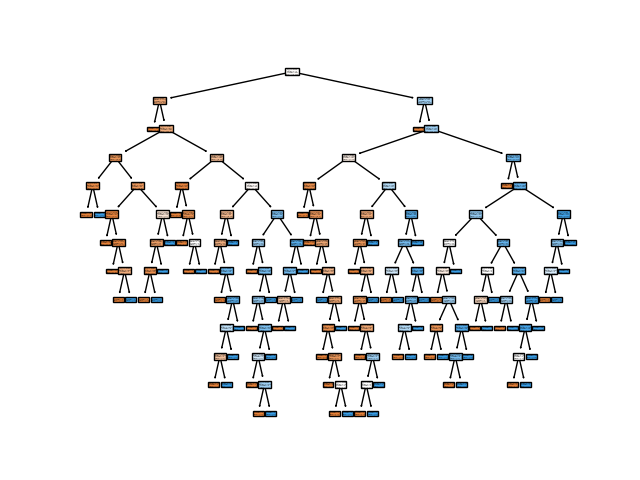

In [8]:
from sklearn.tree import plot_tree

%matplotlib ipympl
plot_tree(dcs_tree_clf.best_estimator_["dcs_tree_clf"], filled=True)